# ECE 4554 / ECE 5554 / Computer Vision
This file contains Problems 5 and 6 (the coding problems) for Homework 2.
Your job is to implement/modify the sections within this notebook that are marked with "TO DO".

##**TO DO**: Enter your Virginia Tech Username (PID) here: ____ddave________________
(Your username is normally part of your email address, as in username@vt.edu.)

##**Honor Code reminder**

Please review the Honor Code statement in the syllabus. This is not a “team project”. If you obtained code or were inspired by code from any source except the instructor, you must cite those sources in your solution.

##**Code libraries**
 You are allowed to use NumPy and Matplotlib functions to perform matrix operations
and graphics/plotting operations. You are also allowed to use any OpenCV functions that
are provided in this start-up notebook. Do not use any other library functions without permission
from the instructor.

##**Submission guidelines** for the coding problems (Google Colab)

1. Please verify that you have entered your Virginia Tech Username in all of the appropriate places.
2. After clicking Runtime->Run all, verify that all of your solutions are visible in this notebook.
3. Click File->Save near the top of the page to save the latest version of your notebook at Google Drive.
4. Verify that the last 2 cells have executed, creating a PDF version of this notebook at Google Drive. (Note: if you face difficulty with this step, please refer to https://pypi.org/project/notebook-as-pdf/)
5. Look at the PDF file and check that all of your solutions are displayed correctly there.
6. Download your notebook file and the PDF version to your laptop.
7. On your laptop, create a ZIP version of this notebook file. (Please don't include the separate data files.) Use file name Homework2_Code_USERNAME.zip, with your own Username.
6. For your PDF version, use file name Homework2_Notebook_USERNAME.pdf, with your own Username.
7. **<span style="color:blue"> Submit these 2 files and your PDF file for Problems 1-4 SEPARATELY to Canvas.**</span> Do not zip them all together.





# Set up the enviroment

In [55]:
# Mount your Google Drive to this notebook
# The purpose is to allow your code to access to your files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
# Change the directory to your own working directory
# Any files under your working directory are available to your code
# TO DO: If needed, edit the 'chdir' line to provide your Google-Drive directory name
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/HW2/')

In [57]:
# Import library modules
import sys
import cv2  # OpenCV library
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image  # PIL is the Python Imaging Library

# The following is a substitute for cv2.imshow,
# which you would use if running on your local machine but Colab does not support it
from google.colab.patches import cv2_imshow

# Print the versions of Python and the imported libraries
print('Python version:', sys.version)
print('OpenCV version:', cv2.__version__)
print('NumPy version: ', np.__version__)

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
OpenCV version: 4.10.0
NumPy version:  1.26.4


---
#Problem 5: Image filtering (10 points)

Write Python/OpenCV code that will apply a linear filter to an image. Demonstrate correct
operation of your code by applying filters that are commonly used for smoothing and edge detection.

For this problem, do not use any OpenCV functions other than basic operations for loading/saving/displaying image files. During the filtering operation, your code must access pixel values directly, probably with nested ’for’ loops. (We know that OpenCV has built-in functions that could be used here, such as cv2.filter2D and cv2.GaussianBlur, but you are not allowed to use them. The purpose of this problem is for you to gain a good understanding of operations at the
pixel level.)

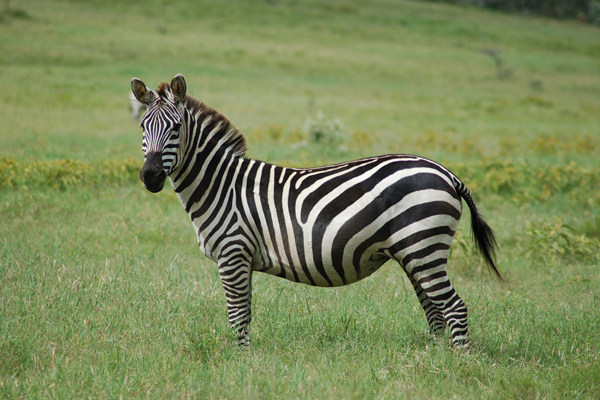

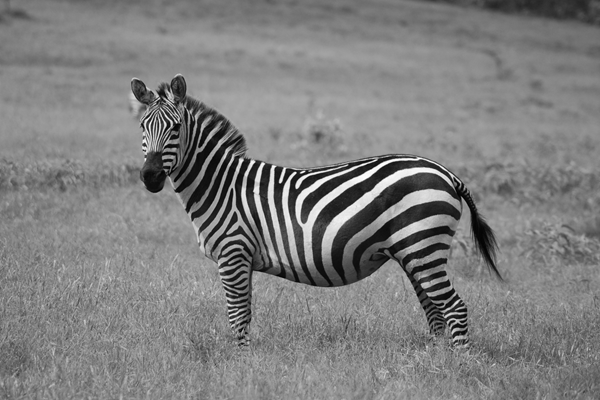

In [58]:
# GETTING STARTED
# Verify that you can input an image from your working directory
# and convert it to grayscale format.
# The resulting img_grayscale will be inputted into the filtering operations.

filename = "zebra.png"
img_color = cv2.imread(filename, cv2.IMREAD_COLOR)
cv2_imshow(img_color)

print ('\n')
img_grayscale = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_grayscale)

a) Write a Python function linear_filter() that accepts an image and a kernel as input parameters. Your function must create an output image by applying the kernel (also called ”filter”, ”operator”, ”template”) to the input image. This new image is returned by your function.

In [59]:
# TO DO Write a linear filter that applies a kernel to an image
def linear_filter(img_in, kernel):
  ''' Filter an input image by applying cross-correlation with a kernel.
  Input:
  img_in: a grayscale image of any size larger than the kernel,
  in both row and column directions.
  kernel: a 2D array of floating-point values;
  you may assume that this array is square,
  with an odd number of rows and an odd number of columns;
  use the *center* of this kernel as its point of reference for filtering.

  Return value:
    an image with the same row/column size as img_in,
    but each pixel is a floating-point value;
    apply the kernel only at locations where it fits entirely within the
    input image;
    the remaining pixels (near the outside border of the output image)
    must be set to zero; for any negative values, take the absolute value;
    clip the final output so that every pixel value lies in the range 0 to 255.
  '''
  height, width = img_in.shape

  # Get kernel dimensions and find the center
  k_height, k_width = kernel.shape
  k_center = k_height // 2  # Since the kernel is square, center in both directions

  img_out = np.zeros_like(img_in, dtype=np.float64)

    # Pad the input image to avoid boundary issues
  padded_image = np.pad(img_in, pad_width=k_center, mode='constant', constant_values=0)

    # Apply the kernel using nested loops
  for i in range(k_center, height + k_center):
    for j in range(k_center, width + k_center):
            # Extract the region of interest (ROI) from the padded image
      roi = padded_image[i - k_center:i + k_center + 1, j - k_center:j + k_center + 1]

            # Perform cross-correlation (element-wise multiplication and sum)
      result = np.sum(roi * kernel)

      img_out[i - k_center, j - k_center] = result

    # Take the absolute value of all pixels
  img_out = np.abs(img_out)

    # Clip pixel values to the range [0, 255]
  img_out = np.clip(img_out, 0, 255)

    # Convert the floating-point result back to unsigned float-64 format
  img_out = img_out.astype(np.float64)

  return img_out



Test your linear_filter() function with the following commands.

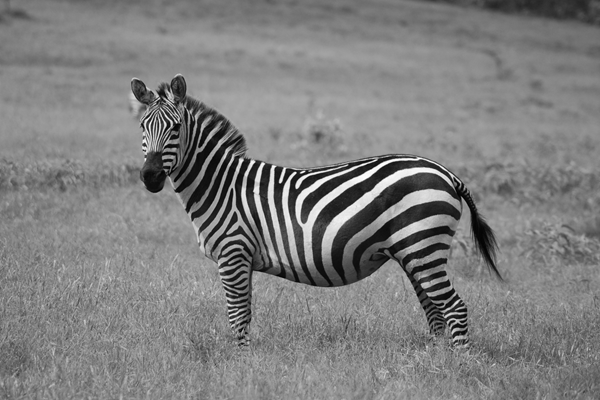

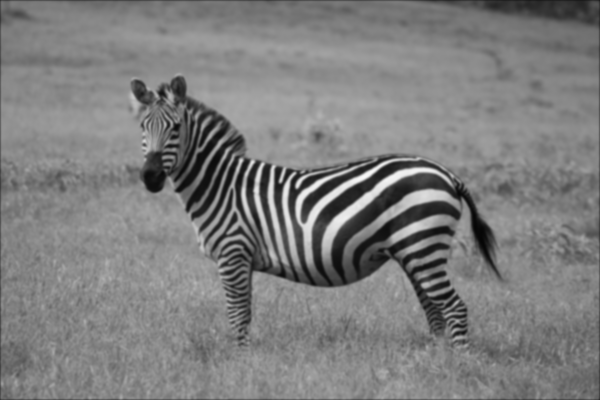

In [60]:
# Here is an example smoothing filter,
#  approximating a 2D Gaussian function with sigma = 1.
kernel = np.array([
          [1, 4, 7, 4, 1],
          [4, 16, 26, 16, 4],
          [7, 26, 41, 26, 7],
          [4, 16, 26, 16, 4],
          [1, 4, 7, 4, 1,]], dtype=np.float64) / 273.0

# Apply the smoothing filter
img_result = linear_filter(img_grayscale, kernel)

# Plot both images to make it easy to see that they are the same size
cv2_imshow(img_grayscale)
print('\n')
cv2_imshow(img_result)

b) Write a function gaussian_kernel() that returns a new kernel of size 9x9, approximating a 2D Gaussian function with sigma = 0.89. Apply this kernel to img_grayscale, and plot the result. (You must calculate these kernel coefficients yourself. It is okay to calculate them at run-time; it is also okay to calculate them in advance and hard-code them into your function. You can use basic Python/NumPy math functions if you wish, but do not use any special OpenCV functions to create a kernel.)


In [61]:
###################################
# TO DO: write the code
def gaussian_kernel():
  """
  Return a Gaussian kernel, to be used for image filtering
  Input parameters:
  none
  Return value:
  a kernel of size 9x9,
  approximating a 2D Gaussian function with sigma = 0.89
  """
  size=9
  sigma=0.89
  G = np.ones((9,9)) # replace this line with your code
  kernel = np.zeros((size, size))

  center = size // 2

    # Calculate the Gaussian function for each value in the kernel
  for x in range(size):
    for y in range(size):
      x_dist = x - center
      y_dist = y - center
      kernel[x, y] = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x_dist**2 + y_dist**2) / (2 * sigma**2))

    # Normalize the kernel so that the sum of all elements is 1
  kernel /= np.sum(kernel)

  return kernel


Test your functions gaussian_kernel() and linear_filter with the following commands.  (Do not modify the following code block.)

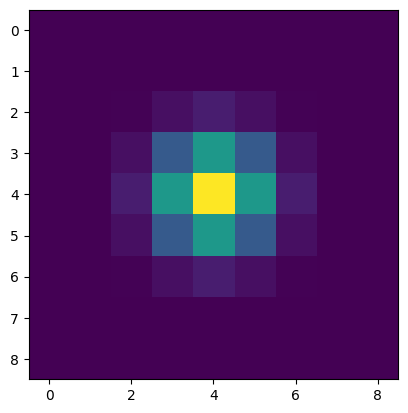

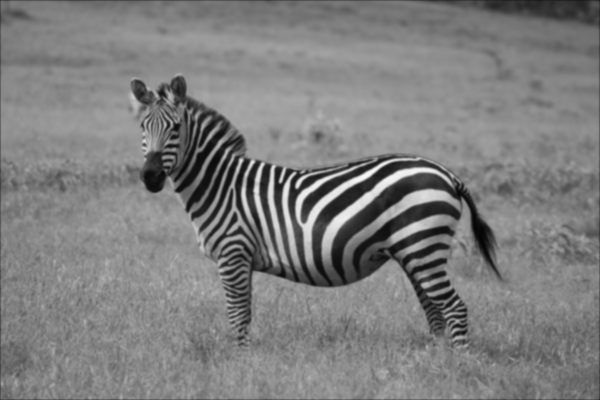

In [62]:
gaussian9x9 = gaussian_kernel()
# display the kernel; the maximum value should be at the center
plt.imshow(gaussian9x9)
plt.show()
# display the filtered image
img_result = linear_filter(img_grayscale, gaussian9x9)
cv2_imshow(img_result)

c) Write code that generates a *Gaussian pyramid*. (The required implementation for this problem is slightly different from the Gaussian pyramids that we will discuss in an upcoming lecture.) For a given grayscale image, apply a 9x9 Gaussian filter with sigma=0.53 and downscale (subsample) the result. In your code, use a loop to perform these steps successively to generate multiple layers of a pyramid, and plot the images.

For full credit, you must use your gaussian_kernel() and linear_filter() functions from the earlier part of this problem. The subsampling step should result in a new image that is half the width and half
the height of the input. (For odd-numbered dimensions, simply ignore the fractional part when computing the new width and height.)

The final pyramid should consist of the original grayscale image along with at least 5 filtered and subsampled images. Display all of the images in your pyramid.

You are encouraged to define and use additional Python functions as part of your solution. For this problem, do not use external or imported functions for filtering or downscaling. Do not use any OpenCV functions other than basic operations for loading/saving/displaying image files.


In [63]:
###################################
# TO DO: write the code
def generate_pyramid(img_in):
  """
  Generate and plot a Gaussian pyramid
  Input parameters:
  img_in: a grayscale image to use for generating the pyramid
  Return value:
  none
  """
    # Display the original grayscale image
  print("Original Image (Level 0):")
  cv2_imshow(img_in)

  kernel = gaussian_kernel()

    # Set the number of pyramid levels
  levels = 5
  current_img = img_in

  # Loop to generate and display each pyramid level
  for i in range(1, levels + 1):
    # Apply Gaussian filter using the linear_filter function
    filtered_img = linear_filter(current_img, kernel)

    height, width = filtered_img.shape
    subsampled_img = filtered_img[::2, ::2]  # Subsample by taking every second pixel

    print(f"Level {i} of the Gaussian Pyramid:")
    cv2_imshow(subsampled_img)

    # Update the current image for the next pyramid level
    current_img = subsampled_img


Use the following code block to test your generate_pyramid() function. (Do not modify the following code block.)

Original Image (Level 0):


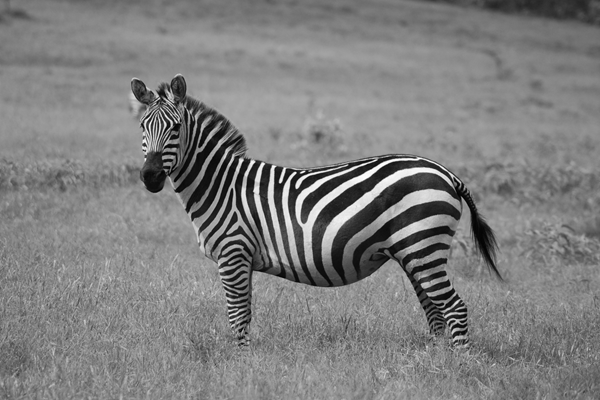

Level 1 of the Gaussian Pyramid:


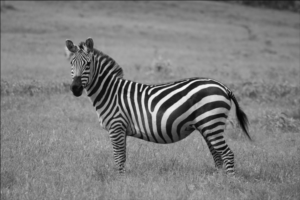

Level 2 of the Gaussian Pyramid:


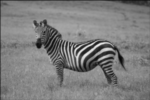

Level 3 of the Gaussian Pyramid:


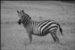

Level 4 of the Gaussian Pyramid:


Level 5 of the Gaussian Pyramid:


In [64]:
filename = "zebra.png"
img_color2 = cv2.imread(filename, cv2.IMREAD_COLOR)
img_grayscale2 = cv2.cvtColor(img_color2, cv2.COLOR_BGR2GRAY)

generate_pyramid(img_grayscale2)

---
# Problem 6: Compass Edge Detection (10 points)


Write a Python function compass_edge() that will input a grayscale image and perform a custom version of "compass" edge detection. The template that points to the North direction is:


(This specification of North follows the discussion from a recent lecture, for which *cross-correlation* was assumed. It is possible that you should use a reversed version of this template if your code performs *convolution* instead. For this problem, either choice will be acceptable for full credit. Please consider how your final output would differ, if at all, if you reverse this template.)

Using this specification of the North direction, decide for yourself some reasonable templates for 7 other compass directions (NW, W, SW, S, SE, E, NE) and implement a compass edge detector that uses these 8 templates. Use comment lines to clearly label the your templates and their directions in your code.

You are encouraged to define new Python functions that form part of your solution.

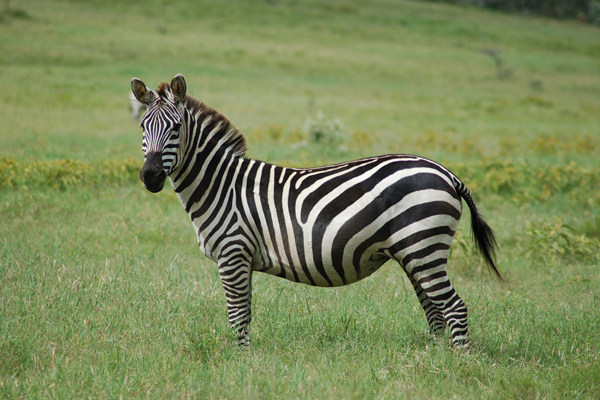

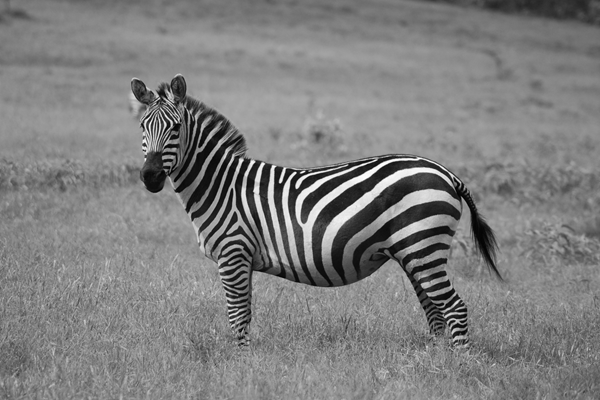

In [65]:
# GETTING STARTED
# Verify that you can input another image from your working directory
# and convert it to grayscale format.
# The resulting img_grayscale will be the input to the edge-detection code.

filename = "zebra.png"
img_color2 = cv2.imread(filename, cv2.IMREAD_COLOR)
cv2_imshow(img_color2)
print ('\n')
img_grayscale2 = cv2.cvtColor(img_color2, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_grayscale2)


You are encouraged to define new Python functions that form part of your solution.


In [66]:
####################################
# TO DO: write the code
def compass_edge(img_grayscale):
  """
  Perform compass edge detection
  Input parameters:
  img_grayscale: a grayscale image to be processed
  Return value:
  img_edge: an "edge" image, containing edge information
    that has been computed for the input img_grayscale;
    this output image must be of the same size (rows x columns) as the input
  """
# Define the 8 compass kernels for edge detection
  kernel_N = np.array([[5, 5, 5],
                         [-3, 0, -3],
                         [-3, -3, -3]], dtype=np.float64)

  kernel_NW = np.array([[5, 5, -3],
                          [5, 0, -3],
                          [-3, -3, -3]], dtype=np.float64)

  kernel_W = np.array([[5, -3, -3],
                         [5, 0, -3],
                         [5, -3, -3]], dtype=np.float64)

  kernel_SW = np.array([[-3, -3, -3],
                          [5, 0, -3],
                          [5, 5, -3]], dtype=np.float64)

  kernel_S = np.array([[-3, -3, -3],
                         [-3, 0, -3],
                         [5, 5, 5]], dtype=np.float64)

  kernel_SE = np.array([[-3, -3, -3],
                          [-3, 0, 5],
                          [-3, 5, 5]], dtype=np.float64)

  kernel_E = np.array([[-3, -3, 5],
                         [-3, 0, 5],
                         [-3, -3, 5]], dtype=np.float64)

  kernel_NE = np.array([[-3, 5, 5],
                          [-3, 0, 5],
                          [-3, -3, -3]], dtype=np.float64)

  edge_N = linear_filter(img_grayscale, kernel_N)
  edge_NW = linear_filter(img_grayscale, kernel_NW)
  edge_W = linear_filter(img_grayscale, kernel_W)
  edge_SW = linear_filter(img_grayscale, kernel_SW)
  edge_S = linear_filter(img_grayscale, kernel_S)
  edge_SE = linear_filter(img_grayscale, kernel_SE)
  edge_E = linear_filter(img_grayscale, kernel_E)
  edge_NE = linear_filter(img_grayscale, kernel_NE)

  img_edge = np.maximum.reduce([edge_N, edge_NW, edge_W, edge_SW, edge_S, edge_SE, edge_E, edge_NE])
  return img_edge


Test your function compass_edge() with the following commands. (Do not modify the following code block.)

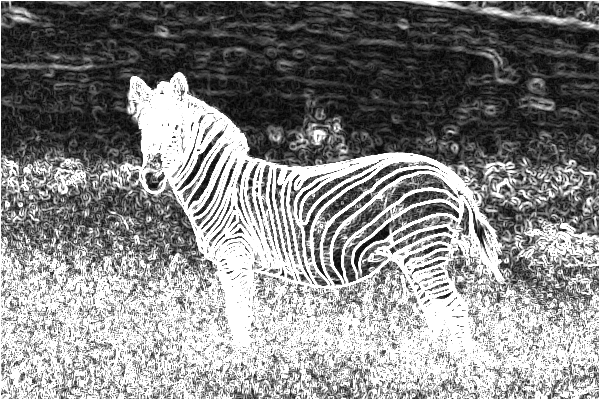

In [67]:
computed_edge_image = compass_edge(img_grayscale)
cv2_imshow(computed_edge_image)

---
# Creating a PDF version of your current notebook

In [68]:
#The following two installation steps are needed to generate a PDF version of the notebook
#(These lines are needed within Google Colab, but are not needed within a local version of Jupyter notebook)
!apt-get -qq install texlive texlive-xetex texlive-latex-extra pandoc
!pip install --quiet pypandoc

In [69]:
# TO DO: Provide the full path to your Jupyter notebook file
!jupyter nbconvert --to PDF "/content/drive/My Drive/Colab Notebooks/HW2/Homework2_ddave.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/HW2/Homework2_ddave.ipynb to PDF
[NbConvertApp] Support files will be in Homework2_ddave_files/
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_ddave_files
[NbConvertApp] Making directory ./Homework2_d